# Movie ratings analysis

In this project we are going to analyze two data set first one that is Walt Hickey data set which can you download from [here](https://github.com/fivethirtyeight/data/tree/master/fandango). Walt Hickey is a journalist who analyzed Fandango rating and proved that the ratings in this site are biased and dishonest. You can read this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/). The ratings actually rounded up for example 4.5 star became 5 star and etc.

the other data base that we are going to use  the dataset that one of Dataquest's members collected movie rating for 2016 and 2017 movies you can download it from [here](https://github.com/mircealex/Movie_ratings_2016_17).

We are going to analyze if the Fandango rating system has been changed or not after Walt Hickey article

First we are going to read each data set into data frame and keep necessary columns which we are interested in and then explore each data set


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


fandango_comp = pd.read_csv("fandango_score_comparison.csv")
movie_16_17 = pd.read_csv("movie_ratings_16_17.csv")

columns_fandango_comp = ["FILM",
                         "Fandango_Stars", 
                         "Fandango_Ratingvalue", 
                         "Fandango_votes",
                         "Fandango_Difference"]

fandango_comp = fandango_comp[columns_fandango_comp]

columns_movie_16_17 = ["movie",
                         "year",
                         "fandango"]
movie_16_17 = movie_16_17[columns_movie_16_17]


In [2]:
print(fandango_comp.info())
fandango_comp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB
None


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [3]:
print(movie_16_17.info())
movie_16_17.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB
None


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


We found out that the sample data sets that we are going to use in this project are not well representative of the population according to our goal. It is very possible that in 2016 or 2017 the movies were bad or very great and we cannot do this comparison based on these samples.

## Changing the goal of the project

We are going to change our goal to one that our samples could be more representative.

We are going to compare ratings of popular movies for 2015 and 2016 based on Fandango rating to see any changes 
We are doing to define popular movies which have more than 30 fan ratings

For this purpose we need to data sets
First one is only 2016 movies and we can acquire that from movie_16_17 data set by removing 2017 movies and the second data set is 2015 movies and we have them in fandango_comp data set

Let's remove 2017 movies from movie_16_17 data set


In [4]:
movie_16 = movie_16_17[movie_16_17["year"] == 2016] 

Then lets  first see if the movies in our samples are popular. we are going to use Hickey's benchmark of 30 fan ratings. lets sample 10 movie fro movie_16 data set

In [5]:
samples_2016 = movie_16.sample(10, random_state = 1)
samples_2016

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


In the date of writing this project in the fandango site they are using Rotten Tomatoes rating instead of their 5 start rating. And according to Rotten Tomatoes we find these numbers o fans rating for each of our samples movie which indicates that all movies in our sample are popular movies


|movie|ratings|
|---|---|
|collide| 3901]
|---|---|
|Ice Age: Collision Course|32929	|
|---|---|
|Now You See Me 2|66787|
|---|---|
|The Disappointments Room|3401|
|---|---|
|Kubo and the Two Strings|35203|
|---|---|
|Pride and Prejudice and Zombies|28138|
|---|---|
|Deadpool|186558|
|---|---|
|Money Monster	|23575|
|---|---|
|War Dogs|28988|
|---|---|
|Miracles from Heaven|22063|

For the fandango_comp some movies actually belongs to 2014 and we need to remove as you can see in the table blow we showed every 2014 movie

In [6]:
fandango_comp[fandango_comp["FILM"].str.contains(r"2014")]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
7,Top Five (2014),4.0,3.5,3223,0.5
12,Leviathan (2014),4.0,3.5,64,0.5
13,Unbroken (2014),4.5,4.1,9443,0.4
14,The Imitation Game (2014),5.0,4.6,8055,0.4
18,Night at the Museum: Secret of the Tomb (2014),4.5,4.1,5445,0.4
25,Selma (2014),5.0,4.6,7025,0.4
28,Wild Tales (2014),4.5,4.1,235,0.4
47,Annie (2014),4.5,4.2,6835,0.3
65,Birdman (2014),4.0,3.7,4194,0.3
69,Mr. Turner (2014),3.5,3.2,290,0.3


lets remove them all

In [7]:
fandango_comp = fandango_comp[fandango_comp["FILM"].str.contains(r"2015")].copy()

In [8]:
fandango_comp.shape

(129, 5)

## Density plots for rating in 2015 and 2016

lets plot density plots for fandango ratings in 2015 and 2016

(0, 5)

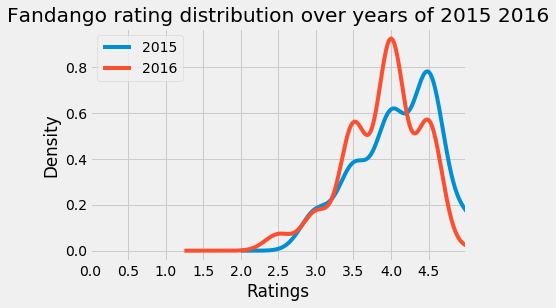

In [9]:
plt.style.use('fivethirtyeight')
fandango_comp["Fandango_Stars"].plot.kde(label = 2015)
movie_16["fandango"].plot.kde(label = 2016)
plt.legend()
plt.xlabel("Ratings")
plt.title("Fandango rating distribution over years of 2015 2016")
plt.xticks(np.arange(0,5,0.5))
plt.xlim(0,5)

- According to plots we can tell that the shape of plot for 2015 is left skewed but for 2016 it is Normal.
- For 2015 ratings start from 2.5 so there is no ratings under this number but for 2016 this number is 2.
- Most of the ratings for 2015 are 4.5 but this number for 2016 is 4.
- Popular movies rated lower in compare to 2015

## Frequency tables for 2015 and 2016 

Let's calculate frequency tables for each data set. Because the numbers of movies in each data set are not equal we need to show this table in relative frequencies like percentage as what we did in the code blow


In [10]:
freq_2015 = fandango_comp["Fandango_Stars"].value_counts(normalize = True).sort_index(ascending = False) * 100
freq_2015

5.0     6.976744
4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
Name: Fandango_Stars, dtype: float64

In [11]:
freq_2016 = movie_16["fandango"].value_counts(normalize = True).sort_index(ascending = False) * 100
freq_2016

5.0     0.523560
4.5    24.607330
4.0    40.314136
3.5    24.083770
3.0     7.329843
2.5     3.141361
Name: fandango, dtype: float64

as we can see for both frequency tables we can again infer that the ratings slightly lower for 2016

## Summary statistics and determining the direction of the change

in this step we are going to calculate summery statistics for each data set and draw bar plot to demonstrate the direction of the change. as in the code blow

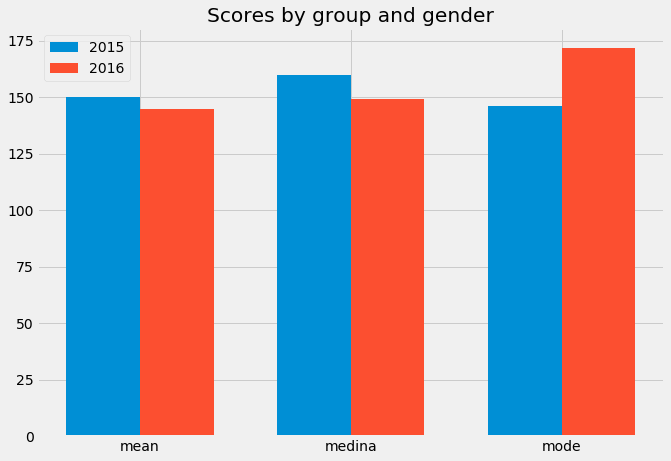

In [30]:
menMeans = (150, 160, 146)
fig, ax = plt.subplots(figsize = (10, 7))
ind = np.arange(3)    
width = 0.35 

stat_2015 = (fandango_comp["Fandango_Stars"].mean(),
             fandango_comp["Fandango_Stars"].median(), 
             fandango_comp["Fandango_Stars"].mode())
p1 = ax.bar(ind, menMeans, width, bottom=0)


stat_2016 = (movie_16["fandango"].mean(),
             movie_16["fandango"].median(),
             movie_16["fandango"].mode())

p2 = ax.bar(ind + width, womenMeans, width, bottom=0)

ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('mean', 'medina', 'mode'))

ax.legend((p1[0], p2[0]), ('2015', '2016'))

ax.autoscale_view()

plt.show()

### To be continued 

in the next steps we are going to include 2017 data set and also other rating website to our analysis